# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
geo = pd.read_excel('geo.xlsx')
geo.head()

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


In [5]:
geo.drop(columns='Unnamed: 0', inplace=True)

In [6]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108806 entries, 0 to 108805
Data columns (total 3 columns):
x                108806 non-null float64
y                108806 non-null float64
comment_class    108806 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.5 MB


In [7]:
geo_xy = geo.drop(columns='comment_class')
geo_xy.head()

,x,y
0,37.612416,55.777454
1,37.612416,55.777454
2,37.603298,55.742108
3,37.558526,55.728758
4,37.566431,55.731794


In [8]:
# Проведем кластеризацию, которая разделит город на районы безотносительно голосов

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
X_scaled = scaler.fit_transform(geo_xy)

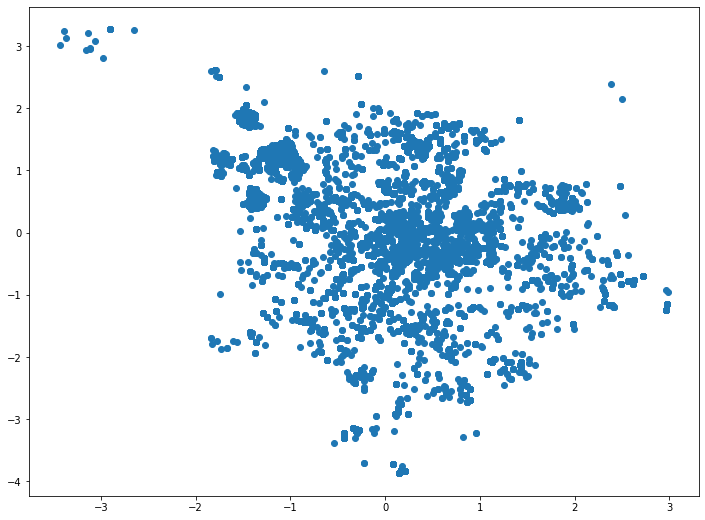

In [12]:
plt.figure(figsize=(12,9))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters = 5)

In [15]:
clusters = kmeans.fit_predict(X_scaled)

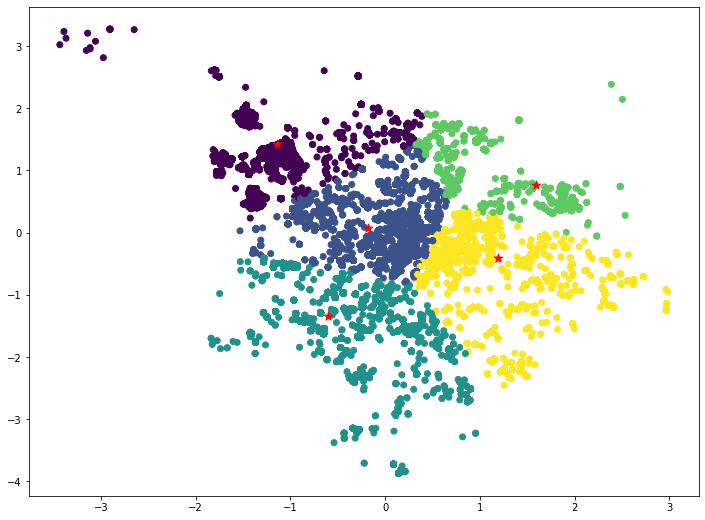

In [16]:
plt.figure(figsize=(12,9))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', marker = '*', s=80)

In [17]:
geo.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [18]:
# Проведем кластеризацию, которая разделит город на районы с голосами За

In [19]:
geo_za = geo[geo.comment_class == 1]
geo_za.head()

,x,y,comment_class
28,37.588916,55.741982,1
45,37.589311,55.734273,1
46,37.558526,55.728758,1
47,37.566431,55.731794,1
61,37.589311,55.734273,1


In [20]:
geo_za = geo_za[['x', 'y']]

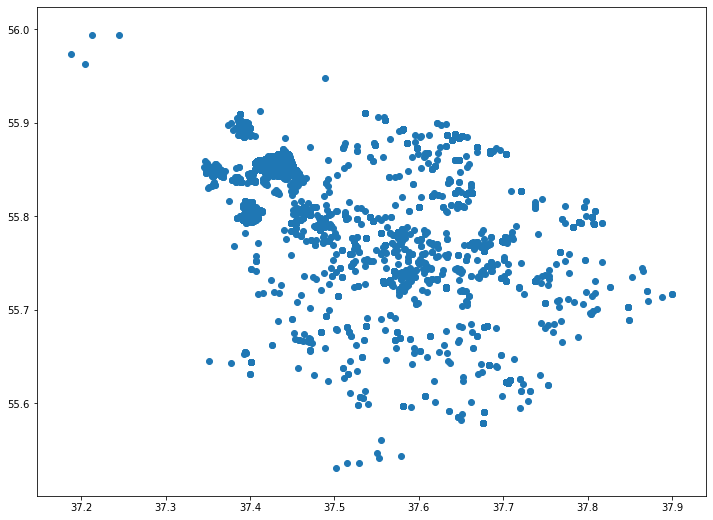

In [21]:
plt.figure(figsize=(12,9))
plt.scatter(geo_za.x, geo_za.y)

In [22]:
kmeans1 = KMeans(n_clusters = 5)

In [23]:
clusters_za = kmeans1.fit_predict(geo_za)

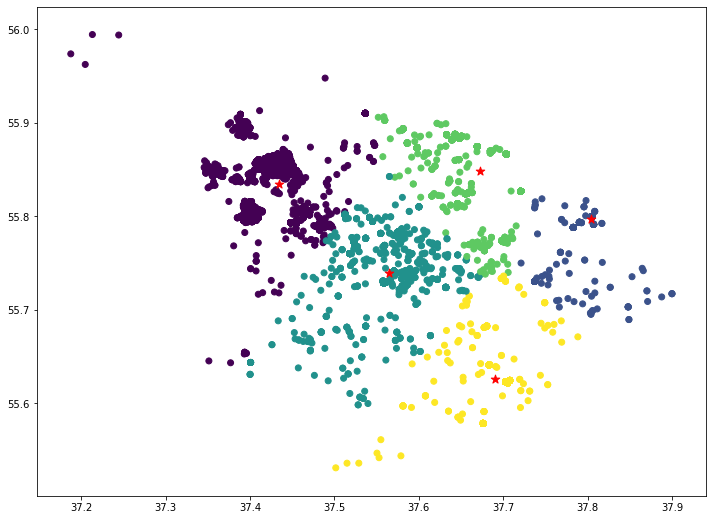

In [24]:
plt.figure(figsize=(12,9))
plt.scatter(geo_za.x, geo_za.y, c=clusters_za)
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], color = 'red', marker = '*', s=80)

In [25]:
# Проведем кластеризацию, которая разделит город на районы с голосами Против

In [26]:
geo_protiv = geo[geo.comment_class == -1]
geo_protiv.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [27]:
geo_protiv = geo_protiv[['x', 'y']]

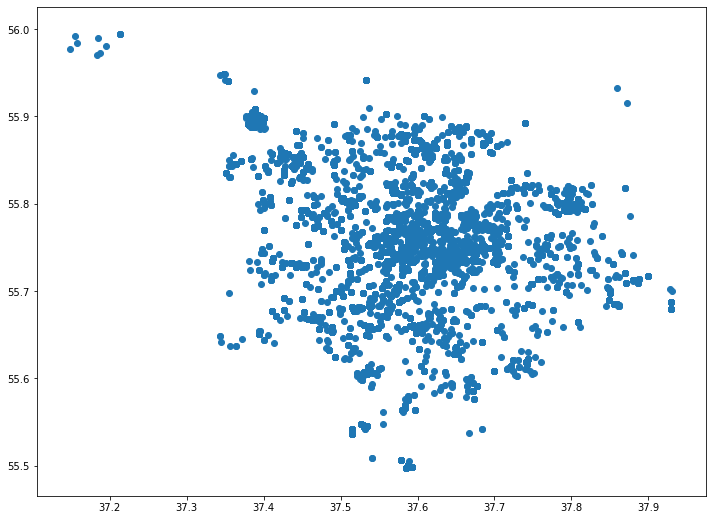

In [28]:
plt.figure(figsize=(12,9))
plt.scatter(geo_protiv.x, geo_protiv.y)

In [29]:
kmeans2 = KMeans(n_clusters = 5)

In [30]:
clusters_protiv = kmeans2.fit_predict(geo_protiv)

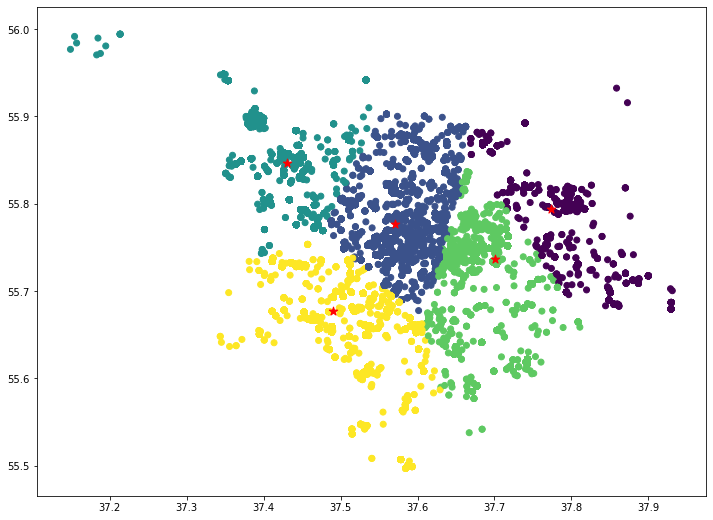

In [31]:
plt.figure(figsize=(12,9))
plt.scatter(geo_protiv.x, geo_protiv.y, c=clusters_protiv)
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], color = 'red', marker = '*', s=80)

In [32]:
# Подбор оптимального числа кластеров. Спойлер: оптимальное кол-во = 3

In [33]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

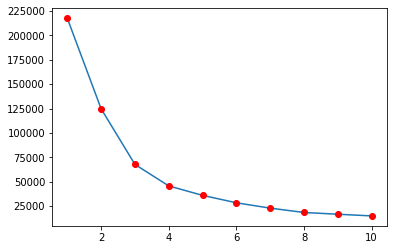

In [34]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [35]:
diff = np.diff(k_inertia)

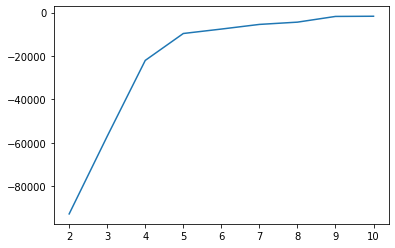

In [36]:
plt.plot(ks[1:], diff)

In [37]:
diff_r = diff[1:] / diff[:-1]

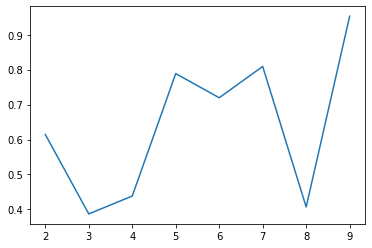

In [38]:
plt.plot(ks[1:-1], diff_r)

In [39]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

3

In [40]:
# Найти наиболее активные в голосовании районы, используя DBSCAN
# Получилось сделать только на выборке с голосами За, на всей выборке компьютер зависает

In [41]:
scaler = StandardScaler()
scaler.fit(geo_za)
X_scaled = scaler.transform(geo_za)

In [42]:
from sklearn.cluster import DBSCAN

In [43]:
dbscan = DBSCAN()

In [44]:
clusters_dbscan = dbscan.fit_predict(X_scaled)

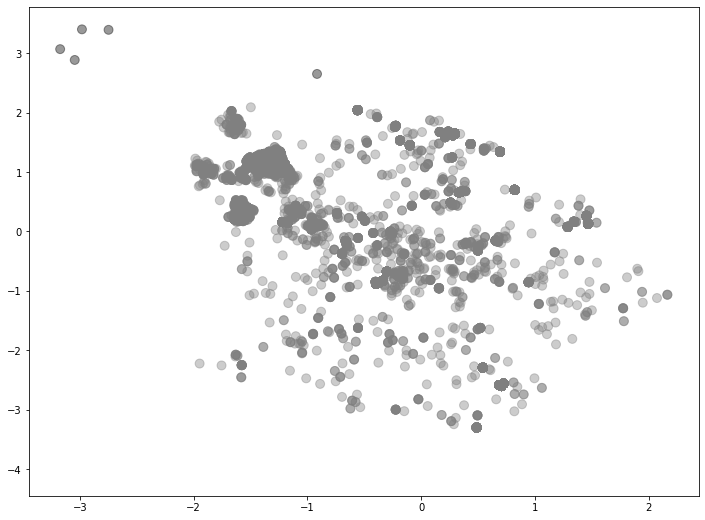

In [45]:
plt.figure(figsize=(12,9))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_dbscan, cmap='gray', s=80, alpha=0.4)